# Лабораторная работа №1
## Пункты 3.1, 3.2, 3.5

### Импортим либы

In [61]:
import random
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tabulate

### Настройки и вспомогательные функции 

In [62]:
# random.seed(1)  # for same results

BINS=32         # number of columns on charts 
DEG=7           #from 2 to 6, for N
N=10**DEG


def R() -> float:
    R = 0
    while R == 0:
        R = random.random()
    return R

### Равномерное распределение

In [63]:
def even_dist(a: int, b: int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        dist[i] = a + R()*(b-a)
    return dist

### Тест

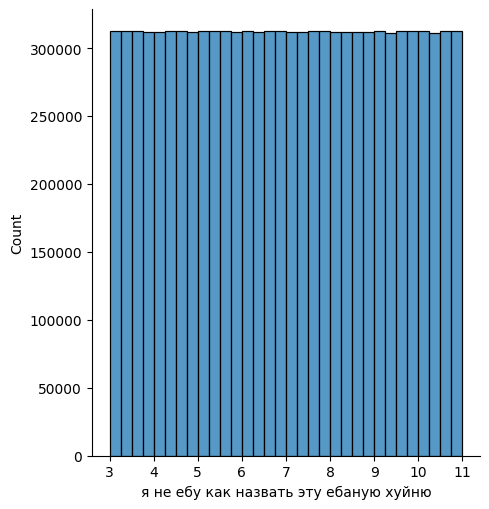

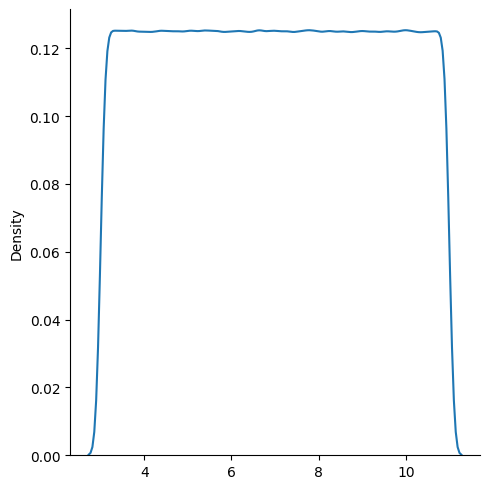

In [64]:
a=3
b=11

d1 = even_dist(a, b, N)
seaborn.displot(d1, bins=BINS)
plt.xlabel('я не ебу как назвать эту ебаную хуйню')
seaborn.displot(d1, kind='kde')

### Экспоненциальное распределение

In [65]:
def exp_dist(l: int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        dist[i] = (-1) * math.log(R())/ l
    return dist

### Тест

KeyboardInterrupt: 

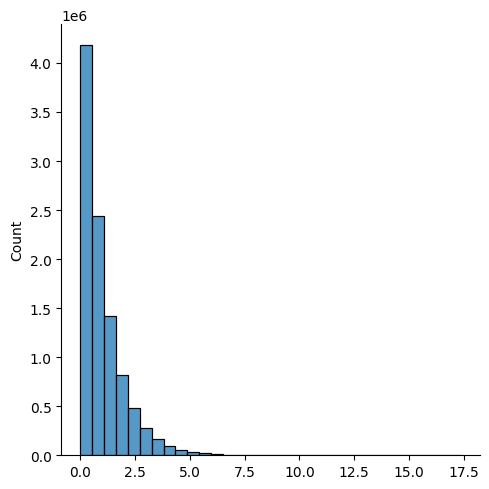

In [66]:
l=1

d2 = exp_dist(l, N)
seaborn.displot(d2, bins=BINS)
seaborn.displot(d2, kind='kde')

### Нормальное распределение

In [ ]:
def norm_dist(m: int, s:int, n: int) -> list:
    dist = [0] * n
    for i in range(n):
        R12 = 0
        for j in range(12):
            R12 += R()
        dist[i] = m + s * (R12 - 6)
    return dist 

### Тест

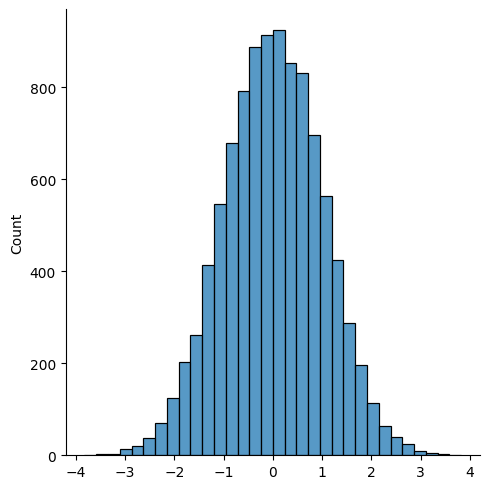

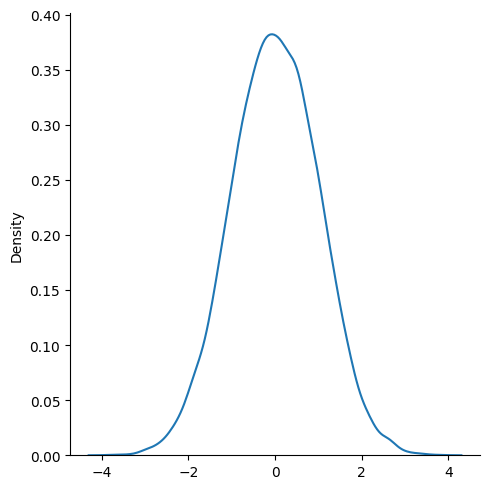

In [ ]:
m=0
s=1

d3 = norm_dist(m, s, N)
seaborn.displot(d3, bins=BINS)
seaborn.displot(d3, kind='kde')

## Пункты 3.3, 3.4

### Функции, рассчитывающие мат. ожидание и дисперсию

In [ ]:
def M(dist: list) -> float:
    return np.mean(dist)

def D(dist: list) -> float:
    return np.var(dist, ddof=1)

### Создание всех необходимых размеров выборок

In [ ]:
n = 10
NS = [n]

while (n < N):
    n *= 2
    NS.append(int(n))
    n *= 2.5
    NS.append(int(n))
    n*=2
    NS.append(int(n))

# instead of
# NS = [10, 20, 50, 100, 200, 500, 1000...]

### Выборки, мат. ожидания, дисперсии, их действительные значения по всем трем распределениям dists...
Итого вспомогательная таблица **t, dists и true_t**

In [ ]:
dists = [d1, d2, d3]
est = [[None for i in range(len(NS))] for j in range(len(dists) * 2)]

for i in range(len(dists)):
    for j in range(len(NS)):
        est[2*i][j] = M(random.choices(dists[i], k=NS[j])) 
        est[2*i+1][j] = D(random.choices(dists[i], k=NS[j]))
        # random.choices(list, k) - выберет из list k элементов случайным образом (могут повторяться)

true_est = [(a+b)/2, ((b-a)**2)/12, 1/l, 1/(l*l), m, s]

### Вывод таблицы

In [ ]:
table = []
dist_names = ['even', 'exp', 'norm']
h = ["N(i)"] + NS + [True]

for i in range(len(dists)):
    table.append([f'M({dist_names[i]}_dist)'] + est[2*i] + [true_est[2*i]])
    table.append([f'D({dist_names[i]}_dist)'] + est[2*i+1] + [true_est[2*i+1]])

print(tabulate.tabulate(table, headers=h, tablefmt="fancy_grid", floatfmt=".3f"))

╒══════════════╤═══════╤════════╤═══════╤═══════╤═══════╤════════╤════════╤════════╤════════╤═════════╤════════╕
│ N(i)         │    10 │     20 │    50 │   100 │   200 │    500 │   1000 │   2000 │   5000 │   10000 │   True │
╞══════════════╪═══════╪════════╪═══════╪═══════╪═══════╪════════╪════════╪════════╪════════╪═════════╪════════╡
│ M(even_dist) │ 6.868 │  7.817 │ 6.953 │ 6.820 │ 7.062 │  7.219 │  6.953 │  7.014 │  7.065 │   6.991 │  7.000 │
├──────────────┼───────┼────────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┼─────────┼────────┤
│ D(even_dist) │ 6.672 │  4.537 │ 5.448 │ 6.300 │ 5.623 │  5.333 │  5.476 │  5.270 │  5.411 │   5.315 │  5.333 │
├──────────────┼───────┼────────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┼─────────┼────────┤
│ M(exp_dist)  │ 1.099 │  1.016 │ 1.104 │ 0.985 │ 1.008 │  0.930 │  1.002 │  1.001 │  1.009 │   1.001 │  1.000 │
├──────────────┼───────┼────────┼───────┼───────┼───────┼────────┼────────┼────────┼────────┼───

### Подготовка данных для вывода графика зависимостей оценок от объема выборки

In [ ]:
nplist = []
hh = [f'N{i+1}' for i in range(len(h)-1)]
hh[-1] = 'N' # подписи для оси Х

# загоняем все данные в датафрейм в ненормализованном виде
for i in range(len(table)):
    for j in range(1, len(table[i])):
        nplist.append([table[i][0], hh[j-1], table[i][j]])

data = pd.DataFrame(np.array(nplist), columns=['est-dist', 'sample', 'value'])
data = data.astype({'value': np.double }) # нужно дать нормальный тип столбцу, который будет вертикальной осью

### Все зависимости на одном графике

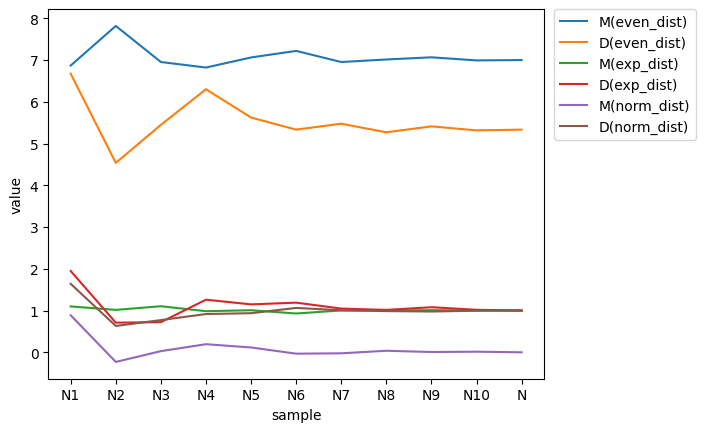

In [ ]:
seaborn.lineplot(data, x='sample', y='value', hue='est-dist')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) # для вывода легенды справа

### Каждая оценка на отдельном графике

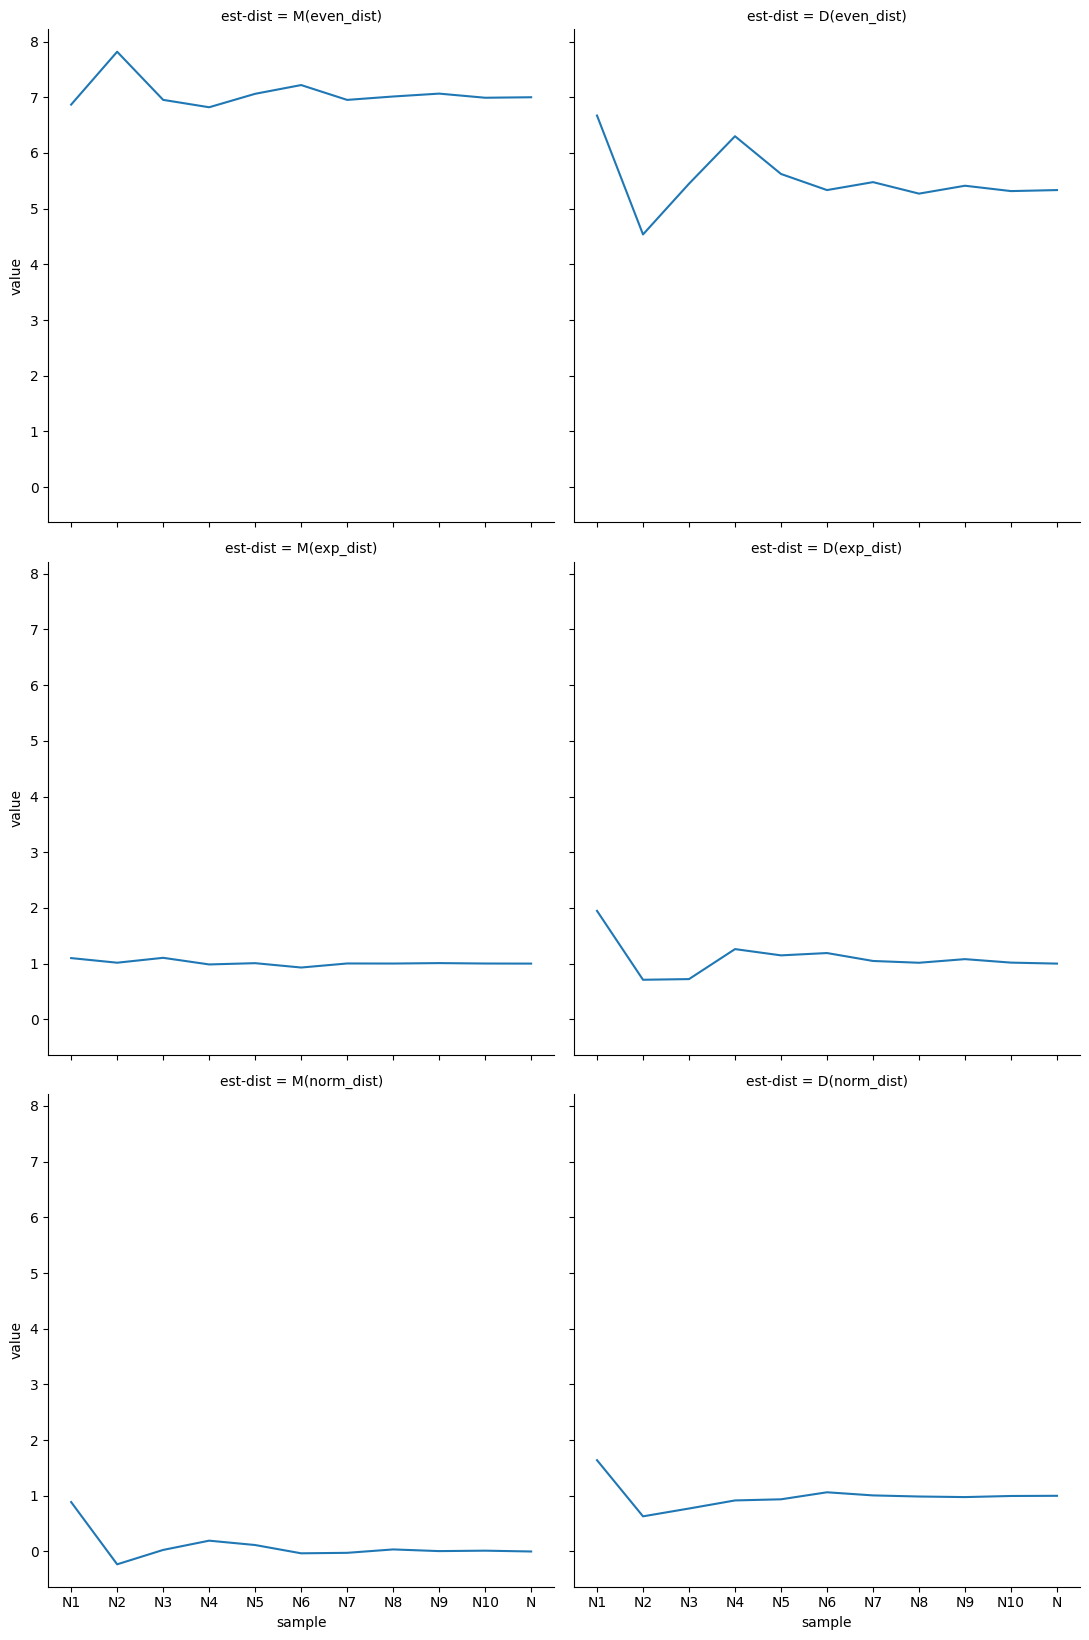

In [ ]:
g = seaborn.FacetGrid(data, col='est-dist', col_wrap=2, height=5.5)
g.map(seaborn.lineplot, 'sample', 'value')

### Считаем статистическую погрешность для выборки N7 (N = 1000)

In [ ]:
s_num = 7 # N7

t = 1 # i dont fucking know why, but this whore said that t = 1
s_size = NS[s_num - 1] # 1000

error_rate = []
error_headers = ['est', 'delta']

for i in range (0, len(table)):
    est = table[i][s_num]
    delta = t * math.sqrt(est * est / s_size)
    error_rate.append([table[i][0], delta])

print(tabulate.tabulate(error_rate, headers=error_headers, tablefmt="fancy_grid", floatfmt=".3f"))

╒══════════════╤═════════╕
│ est          │   delta │
╞══════════════╪═════════╡
│ M(even_dist) │   0.220 │
├──────────────┼─────────┤
│ D(even_dist) │   0.173 │
├──────────────┼─────────┤
│ M(exp_dist)  │   0.032 │
├──────────────┼─────────┤
│ D(exp_dist)  │   0.033 │
├──────────────┼─────────┤
│ M(norm_dist) │   0.001 │
├──────────────┼─────────┤
│ D(norm_dist) │   0.032 │
╘══════════════╧═════════╛
